# DTSA 5510 UNSUPERVISED LEARNING: FINAL PROJECT

* Github Repository: https://github.com/nagyszeru/DTSA-5510.git
* Video Presentation: https://vimeo.com/758073183/4bab206641

# PROBLEM DESCRIPTION

**The goal of this project is gain insight into house values across California.  If California were a country, it would be the fifth largest economy in the world.  From a personal or business perspective, the ability to identify housing and wealth trends across the state presents a wide variety of practical applications, for example, identiying an affordable home to purchase, locating a suitable neighborhood in which to establish a retail store and/or gaining insights to socio-economic trends across the state.**

**With no familiarity with the data nor subject, we will utilize unsupervised learning models to gain insights by analyzing the raw data to group sets of observed locations based on intrinsic similarities.  With clusters identified, we can examine the characteristics that make them similar to better understand the housing values across California.  If we are able to identify labels associated with our clusters, we will then seek to use supervised learning methods with the potential to predict these labels.**

# EXPLORATORY DATA ANALYSIS

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler#, OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math

from io import StringIO 
from sklearn import tree
import pydotplus
from IPython.display import Image

**The California Housing Prices dataset was obtained from Kaggle**

**Reference:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

**The following field defintiions were provided:**

|No.   |   Field   |  Description   | 
| :---:     |:---     |     :---     |  
|     1    |longitude     |A measure of how far west a house is; a more negative value is farther west     | 
|     2    |latitude     |A measure of how far north a house is; a higher value is farther north     | 
|     3    |housingMedianAge     |Median age of a house within a block; a lower number is a newer building   | 
|     4    |totalRooms     |Total number of rooms within a block     | 
|     5    |totalBedrooms     |Total number of bedrooms within a block     | 
|     6    |population     |Total number of people residing within a block     |
|     7    |households     |Total number of households, a group of people residing within a home unit, for a block     |
|     8    |medianIncome     |Median income for households within a block of houses (measured in tens of thousands of US Dollars)     |
|     9    |medianHouseValue     |Median house value for households within a block (measured in US Dollars)     |
|     10    |oceanProximity     |Proximity of the house to the ocean     |

**A sample of the data:**

In [2]:
# Load data
data = pd.read_csv('C:\\Users\\student\\Downloads\\Project\\housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations:**

* **There are 20,640 observations (rows) and 10 attributes (columns).**
* **The attribute 'total_bedroom' is missing 207 values**
* **All attributes are numeric with the exception of 'ocean_proximity'**

### EDA - OBJECT ATTRIBUTE

In [4]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**Observations:**

**Ocean proximity is a categorical value with five values that represent how close the location is from the ocean.  The value of 'Island' appears to be an outlier. In assessing this field, there were two potential options to consider:**

**1. Keep the field yet we would need to use a process called 'one hot encoding' by which categorical variables are converted into a form that could be provided to machine learning algorithms to do a better job in clustering and prediction.**

**2. Delete the field because it is highly correlated with the existing numeric fields latitude and longitude.**

**I concurred with the second option and deleted the field.**

In [5]:
data = data.drop(['ocean_proximity'], axis = 1)

### EDA - NUMERIC ATTRIBUTES

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

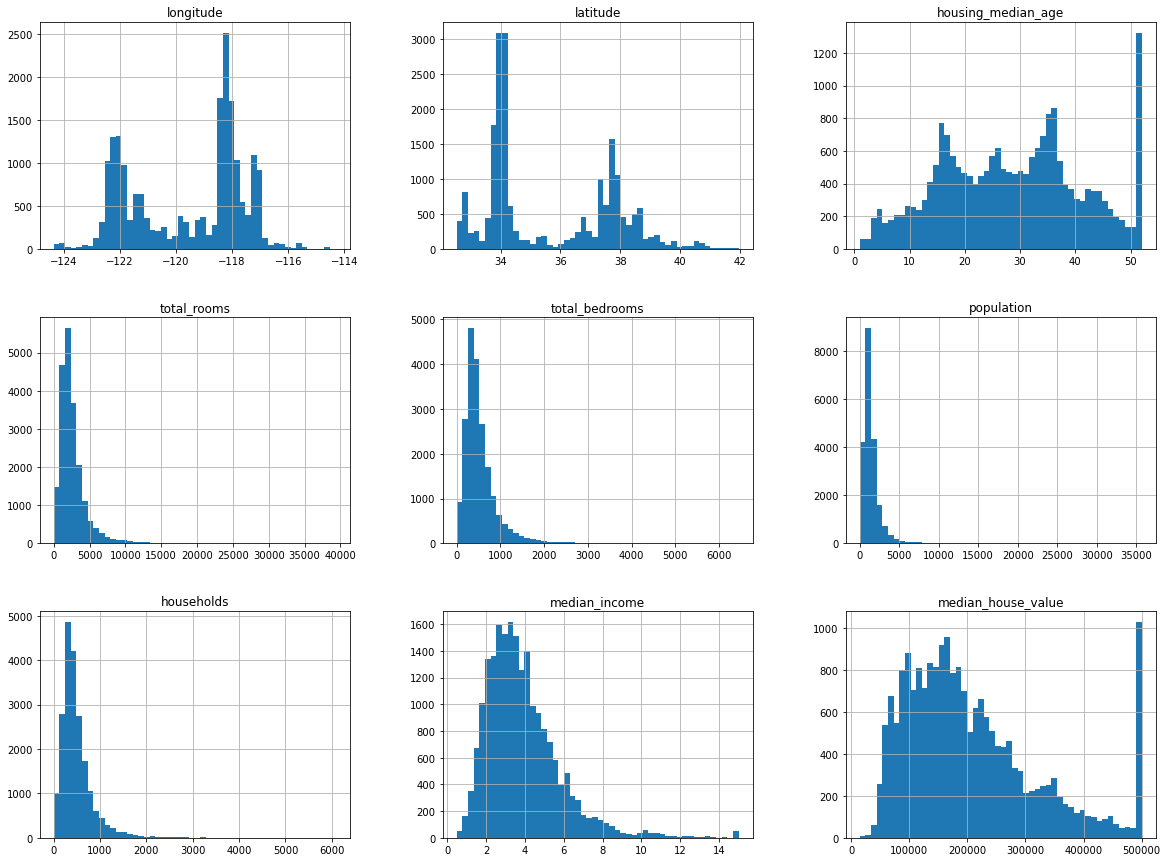

In [7]:
data.hist(bins = 50, figsize = (20,15))

**Observations:**

* **Longitude and Latitude spikes represent:**
    * **Los Angeles 34.0522° N, 118.2437° W**
    * **San Francisco 37.7749° N, 122.4194° W**
* **Housing_median_age shows spikes at approximatly 15 and 35 years. Large spike at 50 years appears to represents 50 *and over.***
* **Median_house_value shows large spike at 500,000 USD which appears to represent 500,000 USD *and over.***

**Due to the various numeric ranges of our values, we will need to standardize the numeric features which will be addressed at the completion of our exploratory data analysis.**

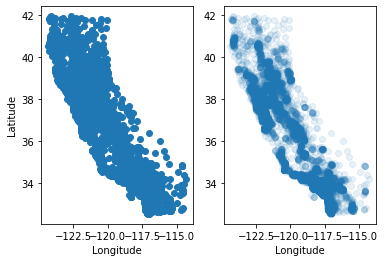

In [8]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(x=data.longitude, y=data.latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.subplot(1, 2, 2) # index 2
plt.scatter(x=data.longitude, y=data.latitude, alpha = .1)
plt.xlabel('Longitude')
plt.ylabel('')

plt.show()

**Observations:**

**If we plot each observation by latitude and longitude, it understandly forms the shape of the state of California.  We can also redraw the same chart (to the right) in order to emphasize areas with higher observations in the dataset in a darker shade, including the areas that would represent Los Angeles and San Fransisco as mentioned earlier.**

<AxesSubplot:title={'center':'Correlation Matrix'}>

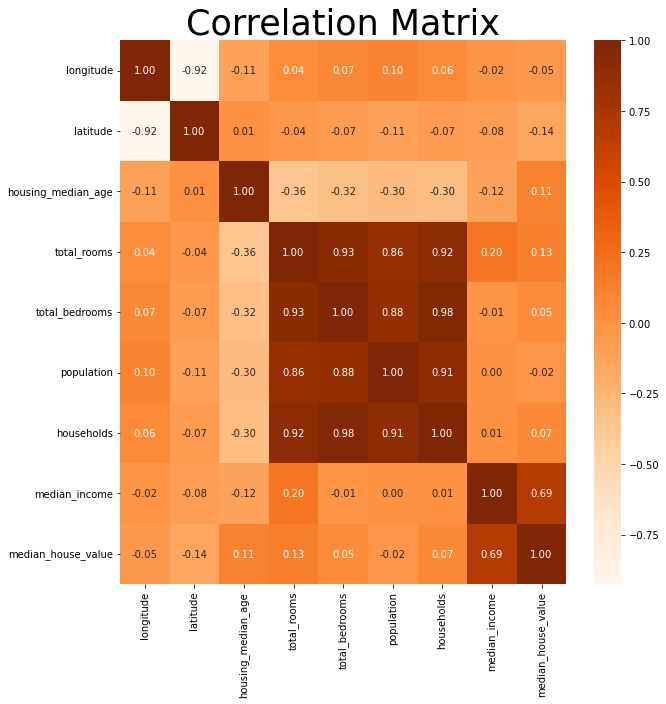

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation Matrix", fontsize =35)
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Oranges')

**The chart above displays the correlations between attributes.  Many of the correlations make intuitive sense, for example - total_bedrooms and total_rooms or population and total_rooms.  In both cases we can understand given increases in the former that there would be increases in the latter.   The correlations of most interest might be those related to the median house values where it is observed house value is:**

* **Postively correlated with income**
* **Negatively correlated with both latitude and longitude, meaning the further north and/or west then the lower the medican house value**

**At this point, based on our analysis we can now conclude to safely drop the 207 rows that are missing values for total_bedroom without impacting our modelling:**

In [10]:
data = data.dropna(subset=["total_bedrooms"])

**Standardization**

**As mentioned above earlier, due to the various numeric ranges of our values, we will standardize the numeric features by removing the mean and scaling to unit variance. Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data:**

In [11]:
columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 
                     'households', 'median_income','median_house_value']
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[columns_to_scale]))
scaled_data.columns = columns_to_scale
scaled_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418
...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316


### EDA - CONCLUSION

**In summary, during we made the following modifications to our original dataset:**

* **Removed 207 rows missing the attribute 'total_bedroom'**
* **Removed the non-numeric field 'ocean proximity'**
* **Due to the range difference between the numeric fields, we have standardized them so thy are on all on the same scale**

**We observed:**
* **Mapping our observations based on latitude and longitude outlines the state of California**
* **There are population peaks visible in Los Angeles and San Francisco**
* **Two fields: Housinge Media Age and Median House Value have a hard stop at a certain cutoff point yet contain values above that value as well**
* **Some fields are strongly correlated to each other like total bedrooms and total rooms or population and total rooms. We hae left these fields in the analysis as the number of bedrooms (versus another type of room) is often a of real estate interest**
* **There is a negative relationship between Median House Value and latitude/longitude, meaning the further north and west travel, the lower the overall prices**

Final cleaned dataset:

In [12]:
scaled_data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183


## MODELS

### UNSUPERVISED APPROACH: K-MEANS

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. From this we can develop business assumptions about what types of groups exist. Our first attempt will build a k-means model, fit it to our cleansed data and then predict against the same data using generic model parameters:

In [14]:
kmeans = KMeans(random_state = 777)
model = kmeans.fit(scaled_data)

In [15]:
# Create cluster label
data['econ_region'] = kmeans.fit_predict(scaled_data)
data['econ_region'] = data['econ_region'].astype("category")

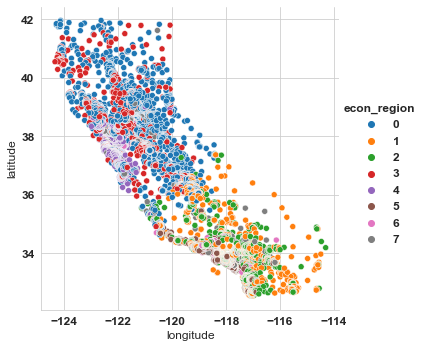

In [16]:
plt.rcParams["figure.figsize"] = (15,5)
font = {'family' : 'normal','weight' : 'bold','size'   : 12}
plt.rc('font', **font)

sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter');

In [17]:
round(data.groupby(['econ_region']).mean().transpose(),2)

econ_region,0,1,2,3,4,5,6,7
longitude,-121.34,-118.02,-117.86,-121.80,-122.15,-118.17,-118.90,-119.48
latitude,38.03,33.97,33.87,38.02,37.60,33.87,35.05,35.53
housing_median_age,18.50,34.12,22.11,40.36,33.20,29.21,11.12,17.28
total_rooms,2507.69,1496.32,3288.47,1548.28,2567.00,2506.63,15998.82,6968.83
total_bedrooms,508.23,334.41,731.57,335.29,449.27,417.58,2989.40,1421.84
population,1302.77,1001.10,1981.66,858.75,1123.55,1044.61,7872.94,3561.32
households,463.39,317.15,671.86,313.17,430.60,396.70,2727.41,1301.72
median_income,3.32,3.15,3.42,2.85,6.02,6.49,4.67,4.17
median_house_value,140854.39,164555.38,180553.18,145567.33,369067.01,386490.49,224364.09,224548.19


**Observations**

**The model default is to create 8 clusters which we can see mapped clearly througout California.** 

* **Clusters 0 and 3 appears to cover Northern California with the lowest median house values**
* **Cluster 4 also appears to over Nothern California yet specifically the coastal aread which corresponds with San Francisco.  This cluster also has the highest median house value**
* **Clusters 1 and 2 appear to cover Southern California**
* **Cluster 5 also appears to over Southern California yet specifically the coastal aread and has the second highest median house value**

**There appears to be a split between Northern vs Southern California along with a third area that goes along a good part of the coast of the state.  Overall the number of clusters make it difficult to get clearer insights.  Next we will turn to parameter tuning.**



**The Elbow Method**

**A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data might be clustered. The Elbow Method is one of the most popular methods to determine the optimal number of clusters where we iterate through a proposed number of clusters and evaulate the resulting values of inertia and distortions for each value where:**


1. **Inertia: Sum of squared distances of samples to their closest cluster center**
2. **Distortion: Average of the squared distances from the cluster centers of the respective clusters**


**To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.**

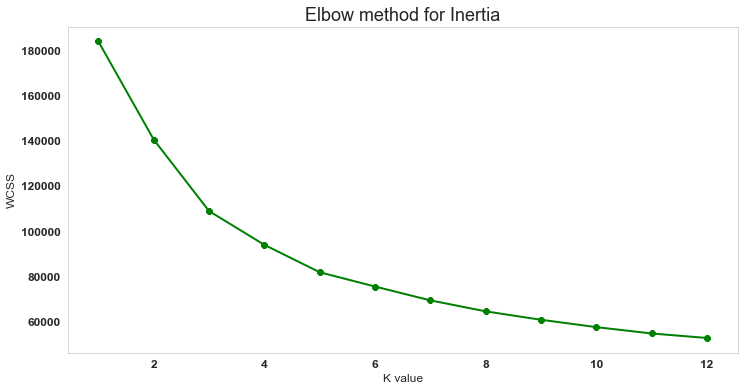

In [18]:
wcss=[]
for k in range(1,13):
    kmeans = KMeans(n_clusters=k, random_state = 777)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,13), wcss, linewidth=2, color='green', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('Elbow method for Inertia', fontsize=18)
plt.show()

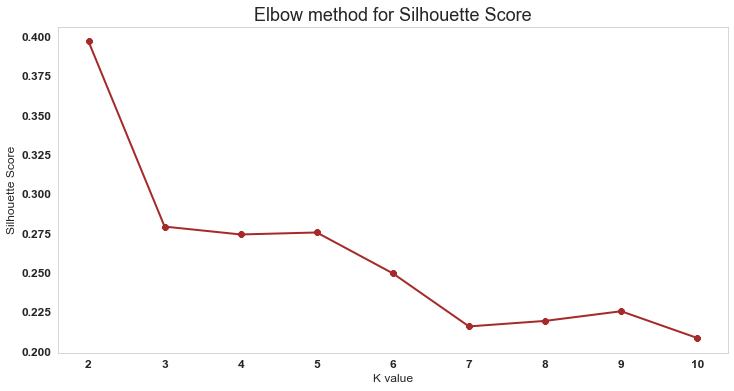

In [19]:
sil = []
for i in [2,3,4,5,6,7,8,9,10]:
    km = KMeans(n_clusters=i, random_state = 777)
    km.fit(scaled_data)
    sil.append(silhouette_score(scaled_data, km.predict(scaled_data)))
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot([2,3,4,5,6,7,8,9,10], sil, linewidth=2, color='brown', marker = '8')
plt.xlabel('K value')
plt.ylabel('Silhouette Score')
plt.title('Elbow method for Silhouette Score', fontsize=18)
plt.show()

**We conclude the optimal number of clusters for the data is n_clusters = 3**   

**The other primary parameters are focused around identifying the initial centroids.  While considerable time was spent exploring the parameters none brought greater insight compared to those brought by lower the number of clusters.  For brevity yet completeness below is table of the parameters evaluated:**


|No.   |   Field   |  Description   | 
| :---:     |:---     |     :---     |  
|     1    |n_clusters     |Number of clusters to form as well as the number of centroids to generate| 
|     2    |init     |Method for initialization: kmeans++ or random| 
|     3    |n_init     |Number of time the k-means algorithm will be run with different centroid seeds, default 10| 
|     4    |max_iter     |Maximum number of iterations of the k-means algorithm for a single run, default 300| 
|     5    |algorithm     |Algorithm used: “lloyd” or “elkan”     | 


**A complete summary of all parameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

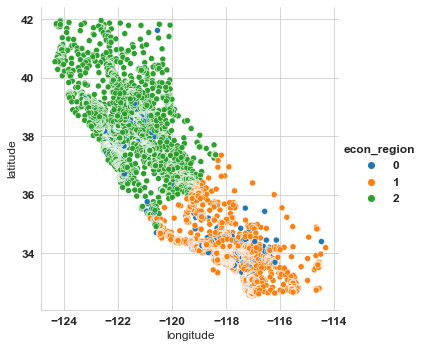

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, max_iter = 300, algorithm = 'lloyd', random_state = 2) 
model = kmeans.fit(scaled_data)
data['econ_region'] = kmeans.fit_predict(scaled_data)
data['econ_region'] = data['econ_region'].astype("category")
plt.rcParams["figure.figsize"] = (15,5)
font = {'family' : 'normal','weight' : 'bold','size'   : 12}
plt.rc('font', **font)
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter');

In [21]:
round(data.groupby(['econ_region']).mean().transpose(),2)

econ_region,0,1,2
longitude,-119.17,-118.00,-121.68
latitude,35.25,33.91,37.94
housing_median_age,16.72,29.71,29.68
total_rooms,7809.52,2168.00,2182.40
total_bedrooms,1563.83,454.82,435.04
population,3967.87,1268.08,1106.67
households,1427.86,426.12,403.99
median_income,4.24,3.91,3.75
median_house_value,224409.00,214556.41,193310.72


**Observations:**

**With 3 clusters, our initial idea of a split between Northern (cluster 2) vs Southern (cluster 1) California along with a third area (cluster 0) is more apparent.  The third area, though not as large overall, is not only coastal now yet spread throughtout.  Rather than 'Coastal' perhaps a better label would be 'Premium' as this cluster has the highest median house value, newest and largest homes.**

In [22]:
data['econ_region']= data['econ_region'].replace([0],'Premium')
data['econ_region']= data['econ_region'].replace([1],'South')
data['econ_region']= data['econ_region'].replace([2],'North')

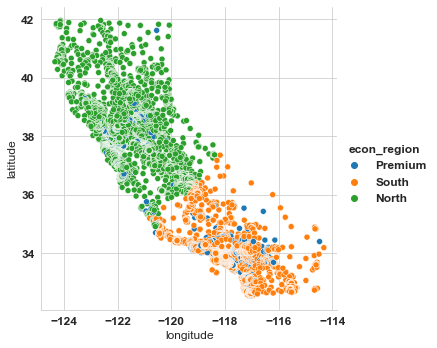

In [23]:
plt.rcParams["figure.figsize"] = (15,5)
font = {'family' : 'normal','weight' : 'bold','size'   : 12}
plt.rc('font', **font)

sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter');

In [24]:
round(data.groupby(['econ_region']).mean().transpose(),2)

econ_region,Premium,South,North
longitude,-119.17,-118.00,-121.68
latitude,35.25,33.91,37.94
housing_median_age,16.72,29.71,29.68
total_rooms,7809.52,2168.00,2182.40
total_bedrooms,1563.83,454.82,435.04
population,3967.87,1268.08,1106.67
households,1427.86,426.12,403.99
median_income,4.24,3.91,3.75
median_house_value,224409.00,214556.41,193310.72


**Observation:**

**Now we have clearer insight into the California housing data with three primary groupings:**

1. **Northern California:  The geographic Northern part of the state tends to have lower income and home values.**
2. **Southern California:  The geographic Southern part of the state tends to have lower income and home values.**
3. **Premium Areas:  Often located along the coast yet not always,these enclaves encompass the wealthiest population with the most expensive homes which tend to be largeer and newer than the other areas**


### UNSUPERVISED APPROACH: HIERARCHICAL CLUSTERING

**Next we will look at an alternate method to compare clustering results.  Hierarchal, specifically agglomerative clustering, builds our clusters from the bottom up by successfully linking the nearest groups.  Full results on our datast are shown below using a dendogram to illustrate:**

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


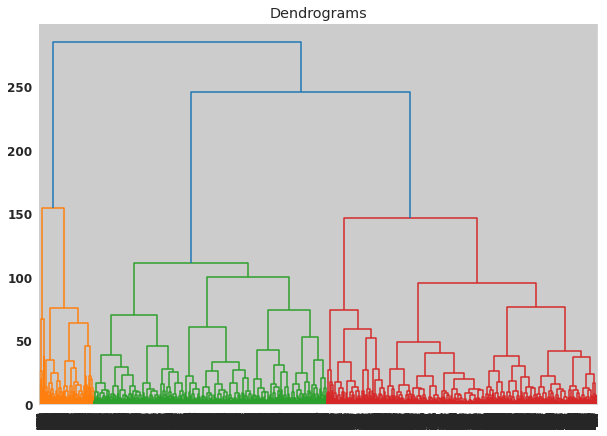

In [49]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

**Based on the dendogram and prior observations from k-means, let's draw a line at a height of 125 to obtain three clusters from the hiearchy, then build the agglomerative model on those three clusters and map the results:**

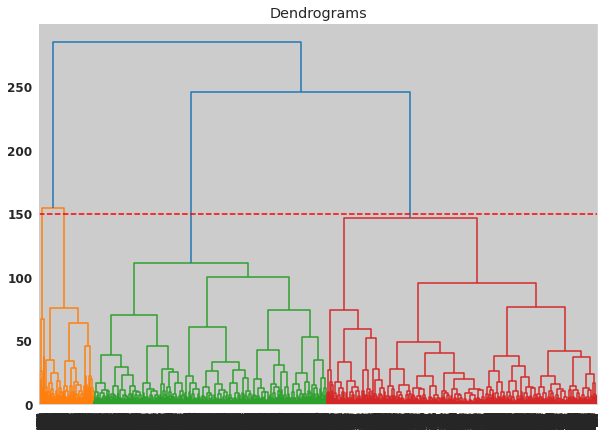

In [51]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')

In [25]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_data)

array([2, 0, 2, ..., 2, 2, 2], dtype=int64)

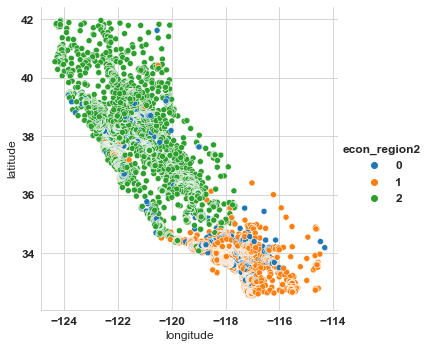

In [26]:
data['econ_region2'] = cluster.fit_predict(scaled_data)
data['econ_region2'] = data['econ_region2'].astype("category")
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region2', data=data, kind='scatter');

In [27]:
round(data.groupby(['econ_region2']).mean().transpose(),2)

econ_region2,0,1,2
longitude,-119.29,-117.96,-121.50
latitude,35.45,33.86,37.74
housing_median_age,15.76,30.47,29.54
total_rooms,7215.66,2132.36,2140.99
total_bedrooms,1431.52,452.39,426.20
population,3641.83,1263.06,1089.76
households,1303.54,424.87,396.23
median_income,4.12,4.02,3.63
median_house_value,204826.61,224862.63,186475.17


**The above clusters are very similiar to the k-means clusters: Northern CA, Southern CA and Premium.**

**I then proceeded to evaluate tuning of parameters involving distance calculation and linkage with often similar and sometimes alternative results.  While documenting all the models would be lengthy the alternatie model below is indicative of the range of potential results:**

In [28]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')  
cluster.fit_predict(scaled_data)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

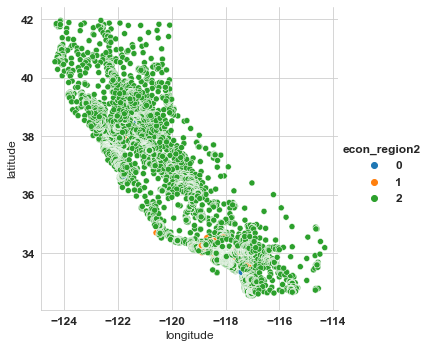

In [29]:
data['econ_region2'] = cluster.fit_predict(scaled_data)
data['econ_region2'] = data['econ_region2'].astype("category")
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region2', data=data, kind='scatter');

In [30]:
round(data.groupby(['econ_region2']).mean().transpose(),2)

econ_region2,0,1,2
longitude,-119.23,-118.45,-119.58
latitude,35.27,34.58,35.64
housing_median_age,8.00,10.35,28.79
total_rooms,33414.60,16054.51,2520.32
total_bedrooms,5647.00,2982.96,516.82
population,22436.40,7527.71,1370.37
households,5289.60,2703.98,480.41
median_income,4.67,4.81,3.86
median_house_value,205420.00,231025.04,206669.23


**While our clustering results are highly dependent on the specific parameters used, after review and assessment of the various model results, overall we can continue to align and concur with our three clusters:**

1. **Northern California: The geographic Northern part of the state tends to have lower income and home values.**
2. **Southern California: The geographic Southern part of the state tends to have lower income and home values.**
3. **Premium Areas: Often located along the coast yet not always,these enclaves encompass the wealthiest population with the most expensive homes which tend to be largeer and newer than the other areas**


## SUPERVISED MODELS

**In this section, we convert the unsupervised clustering problem into a supervised classification problem using an easily interpretable classifier like a DecisionTree classifier in the following manner:**

1. **Change the cluster labels into binary labels which the supervised model will use as a target**
2. **Train a Decision Tree classifier to predict the target**
3. **Extract the feature importances from the supervised model in order to understand the features which most impact model.**

## Decision Tree Classifier

In [25]:
y = data['econ_region']

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(scaled_data, y, test_size=0.30, random_state=777)

In [27]:
dt = DecisionTreeClassifier(random_state=777)
dt.fit(X_train, y_train)
print('Accuracy of decision tree classifier on test set: {:.5f}'.format(dt.score(X_test, y_test)))
print("Max depth of tree was", dt.tree_.max_depth)
print("Tree node count was ", dt.tree_.node_count)

Accuracy of decision tree classifier on test set: 0.98630
Max depth of tree was 13
Tree node count was  267


**Observations**

**In the above code, we executed a DecisionTree classifier against the California housing data set.  The accuracy, precision and recalls were very good at close to 98% for all.  Since we used the default parameters that do not set a limit on the depth of the tree it went down to a depth of 13 with a node count of 267 so we should examine the potential for overfitting to have occured.**

**To evaluate the potential of overfitting with the resulting max_depth= 14, we can ran successive models starting at max_depth = 1 up to max_depth 14 to examine accuracy score for each Decision Tree to see if we can determine at what level overitting might start occuring.**

Text(0, 0.5, 'Accuracy')

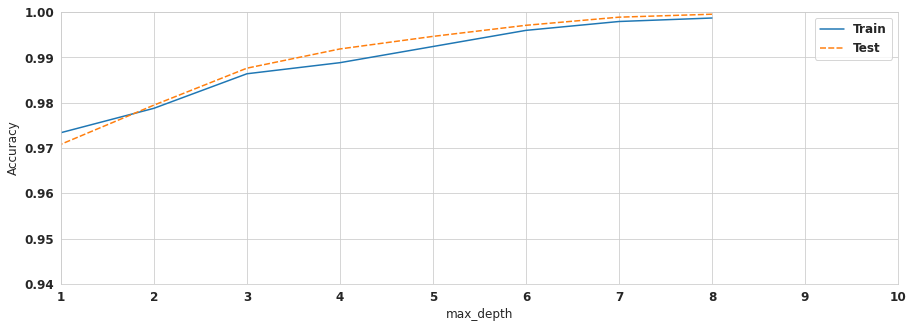

In [30]:
def dt_models(X, y, n_max_depth = 1):
    
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(criterion='gini', max_depth = n_max_depth, random_state=777)
    dt.fit(X, y)
    return dt.score(X, y)

a=[]
#print('Results using training set:')
for i in range(1,10):
    model = dt_models(X_train, y_train, i)
    a.append(model)
b=[]    
#print('Results using test set:')
for i in range(1,10):
    model = dt_models(X_test, y_test, i)
    b.append(model)    

plt.rcParams["figure.figsize"] = (15,5)
font = {'family' : 'normal','weight' : 'bold','size'   : 12}
plt.rc('font', **font)

d={'Train': a, 'Test': b}
df = pd.DataFrame(d)
plt.xlim(1,10)
plt.ylim(.94, 1)
s=sns.lineplot(data=df)
s.set_xlabel("max_depth")
s.set_ylabel("Accuracy")

**Observations:**

**The resulting chart above was clipped at max_depth = 8 (rather than 13) for readability since we can see testing accuracy already overtakes training acuracy at approximately max_depth 3 and greater.  We should rerun the Decision Tree at max_depth = 3 to evaluate the revised results and avoiding the potential for overfitting:**

In [31]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=777)
dt.fit(X_train, y_train)
print('Accuracy of decision tree classifier on test set: {:.5f}'.format(dt.score(X_test, y_test)))
print("Max depth of tree was", dt.tree_.max_depth)
print("Tree node count was ", dt.tree_.node_count)

Accuracy of decision tree classifier on test set: 0.97341
Max depth of tree was 3
Tree node count was  15


**Observations:**

**The updated Decision Tree, at max_depth = 3, helped us avoid the potential for overfitting yet reduced the accuracy score slightly to a still very respectable 97%.  With our improved Decistion Tree we can proceed with our intent to extract the feature importances from the supervised model in order to understand the features which most impact the model.**

In [32]:
df = pd.DataFrame({'Feature_Names': X_train.columns, 'Importance':dt.feature_importances_})
df.Importance = round(df.Importance,2)
df1 = df.sort_values(by='Importance',ascending=False)
df1

,Feature_Names,Importance
1,latitude,0.75
6,households,0.22
0,longitude,0.02
3,total_rooms,0.01
2,housing_median_age,0.00
4,total_bedrooms,0.00
5,population,0.00
7,median_income,0.00
8,median_house_value,0.00


**Observations:**

**Our supervised model has provided important insight into the features.  In comparison to our assumptions during EDA, there are 2 features most important to the model:**

* **Latitude** 
* **Households**

**Several variables contribute little or nothing to the model.  We can drop these features and confirm the accuracy does not decrease:**

In [33]:
scaled_data2 = scaled_data.drop(['housing_median_age','total_bedrooms','population',
                                     'median_income','median_house_value'], axis = 1)

In [34]:
scaled_data2.head(2)

,longitude,latitude,total_rooms,households
0,-1.327314,1.051717,-0.803813,-0.976833
1,-1.322323,1.042355,2.042130,1.670373


In [35]:
X_train, X_test, y_train, y_test =  train_test_split(scaled_data2, y, test_size=0.30, random_state=777)

In [49]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=777)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.5f}'.format(dt.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.97341


**Observation**

**The accuracy of the DecisionTree classifier remained at 97% after removing the unimportant features.  Let's look at the resulting decision tree and confusion matrix with accuracy, prediction and recall:**

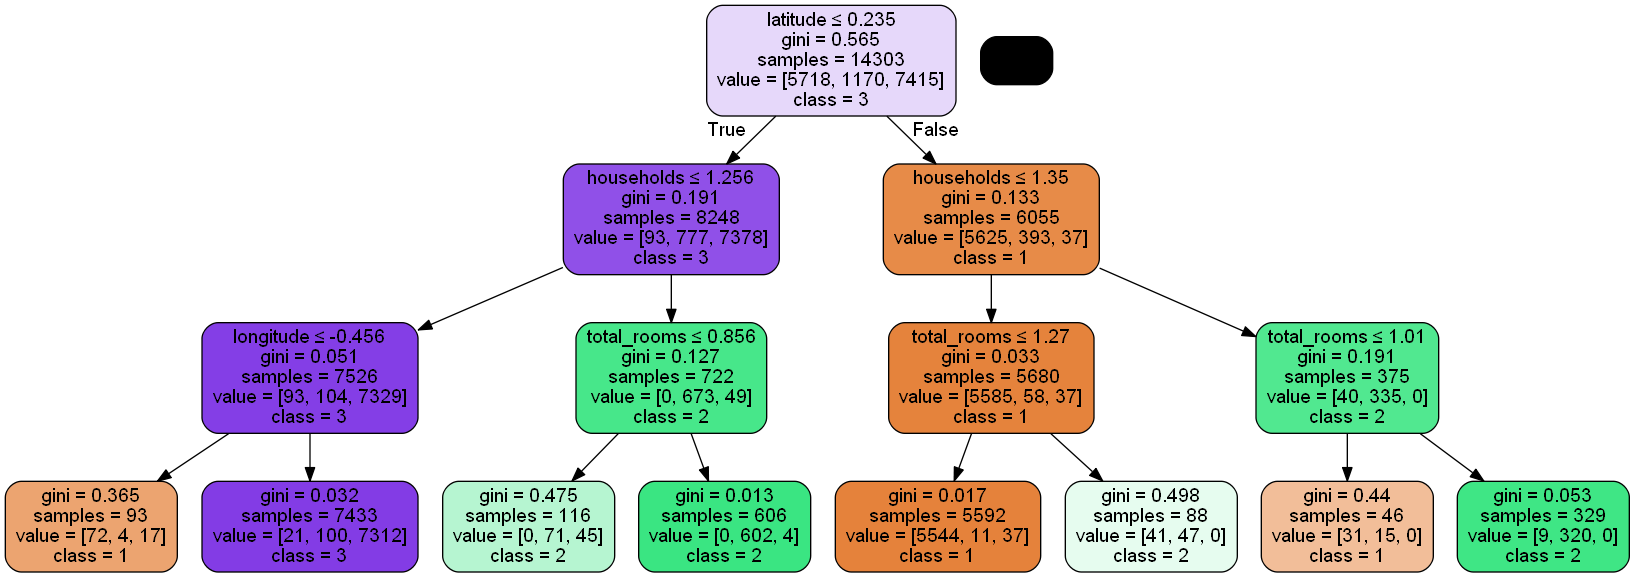

In [50]:
def plot_decision_tree(clf, feature_name, target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data, 
                        feature_names = feature_name,
                        class_names = target_name,
                        filled=True, rounded=True,
                        special_characters=True)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

plot_decision_tree(dt, X_train.columns, ['1','2','3','4'])

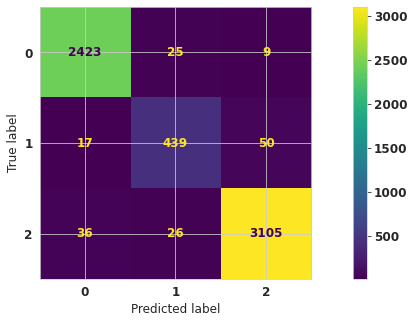

              precision    recall  f1-score   support

       North       0.98      0.99      0.98      2457
     Premium       0.90      0.87      0.88       506
       South       0.98      0.98      0.98      3167

    accuracy                           0.97      6130
   macro avg       0.95      0.94      0.95      6130
weighted avg       0.97      0.97      0.97      6130



In [51]:
dtconfusion_matrix = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(dtconfusion_matrix)
disp.plot()
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

**Observations:**
 
**We gained important insights into the feature most important to the predicting the data: latitude (north/south)and househoulds and a high accuracy in predicting our assumed labels:**

1. **Northern California: The geographic Northern part of the state tends to have lower income and home values**
2. **Southern California: The geographic Southern part of the state tends to have lower income and home values**
3. **Premium Areas: Often located along the coast yet not always,these enclaves encompass the wealthiest population with the most expensive homes which tend to be largeer and newer than the other areas**

## Logistic Regression

**Let's keep going with another supervised model to see if we can improve predictive accuracy to a greater extent.**

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logregconfusion_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98320


**Observations:**

**The Logistic Regression model resulted in our best results yet with 98% accuracy.  Let us look at the feature importance related to this model:**

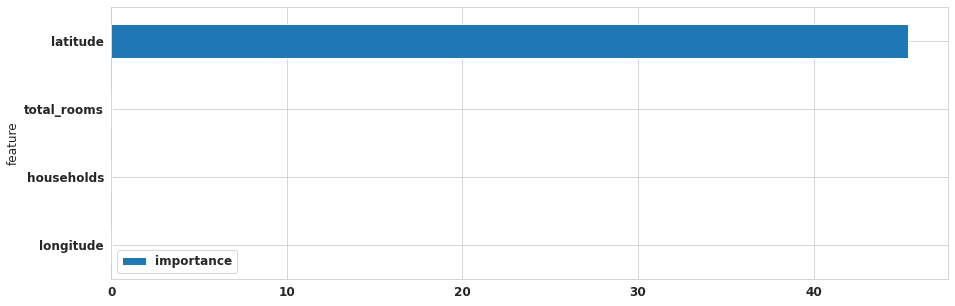

In [39]:
feature_names = scaled_data2.columns
w = logreg.coef_[0]

feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

plt.rcParams["figure.figsize"] = (15,5)
font = {'family' : 'normal','weight' : 'bold','size'   : 12}
plt.rc('font', **font)
ax = feature_importance.plot.barh(x='feature', y='importance')
ax.invert_yaxis()
plt.show()

**Observation**

**Surprisingly, the Logistic Model heavily relies upon latitude which prompted some interpretation and a decision to rerun the model - this time including the fields we had previously removed based on the DecisionTree classifer feature importance:**

In [40]:
X_train, X_test, y_train, y_test =  train_test_split(scaled_data, y, test_size=0.30, random_state=777)

Accuracy of logistic regression classifier on test set: 0.99560


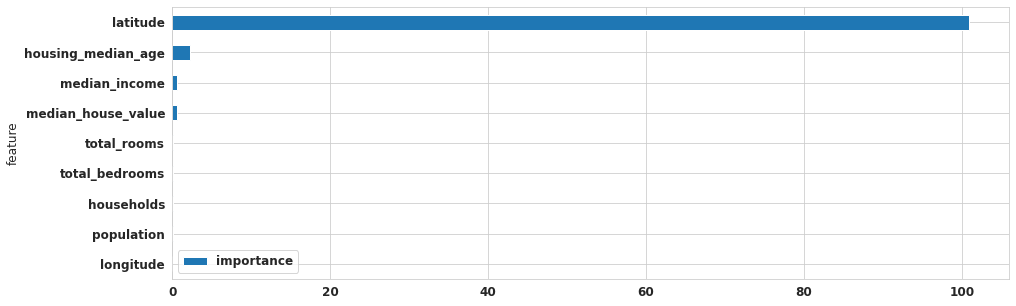

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logregconfusion_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

feature_names = scaled_data.columns
w = logreg.coef_[0]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

plt.rcParams["figure.figsize"] = (15,5)
font = {'family' : 'normal','weight' : 'bold','size'   : 12}
plt.rc('font', **font)
ax = feature_importance.plot.barh(x='feature', y='importance')
ax.invert_yaxis()
plt.show()

**Observation**

**With the additional features, returned, the Logistic Regression model accuracy score improved to 99% as the feature importance shows a reliance on additional factors to latitude, including housing median age, median income and medican house value.  The final confusion matrix with accuracy, precision and recall rates:**

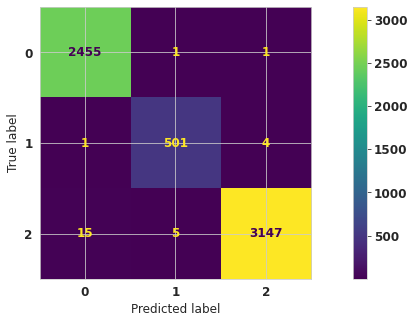

              precision    recall  f1-score   support

       North       0.99      1.00      1.00      2457
     Premium       0.99      0.99      0.99       506
       South       1.00      0.99      1.00      3167

    accuracy                           1.00      6130
   macro avg       0.99      0.99      0.99      6130
weighted avg       1.00      1.00      1.00      6130



In [52]:
disp = metrics.ConfusionMatrixDisplay(logregconfusion_matrix)
disp.plot()
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## CONCLUSIONS

**Let's summarize the steps we have taken and intrepret the results:**

1. **Exploratory Data Analysis**

    **What we did:**
    Observed we had a file on California housing data from 1990 containing information on housing, population and income across     the state. There were ten features which were all numeric except one which we ultimately deleted due to it's high               correlation with other dimensions leaving us with all numeric features which we observed through tables, histograms and         correlation matrices. A limited amount of missing data was dropped. The number of variables left were manageable and we         dismissed the need to compress them using principal component analys. Finally all fields were standardized for model           building.  

    **We observed:**
    * Mapping our observations based on latitude and longitude outlines the state of California
    * There are population peaks visible in Los Angeles and San Francisco
    * Two fields: Housinge Media Age and Median House Value have a hard stop at a certain cutoff point yet contain values above       that value as well
    * Some fields are strongly correlated to each other like total bedrooms and total rooms or population and total rooms. We         have left these fields in the analysis as the number of bedrooms (versus another type of room) is often a of real estate       interest
    * There is a negative relationship between Median House Value and latitude/longitude, meaning the further north and west         travel, the lower the overall prices.

2. **Unsupervised Learning:**

    **What we did:**
    1. K-means clustering
    2. Hierarchal clustering

    **We observed:**
    * Three clusters, first visible through k-means and concurred through hierarchal clustering:
        1. Northern California: The geographic Northern part of the state tends to have lower income and home values.
        2. Southern California: The geographic Southern part of the state tends to have lower income and home values.
        3.Premium Areas: Often located along the coast yet not always,these enclaves encompass the wealthiest population with             the most expensive homes which tend to be largeer and newer than the other areas
    * Clustering results are highly dependent on the parameters used.

3. **Supervised Learning: Hierarchal Clustering**

    **What we did:**
    Converted our three cluster definitions into labels for predication against test data with:
    1. Decision Tree Classifier
    2. Logistic Regression Classifier

    **We observed:**
    * Based on feature importance ranking of the models: latitude, longitude and households were key features
    * The key features varied between the two types of classifiers, yet were similar.
    * The supervised models were able to predict our assumed labels with a high degree of accuracy after parameter tuning:
        * Decision tree 97%
        * Logistic regression 99%

Our journey began, with an unfamiliar dataset.  Through exploratory data analysis, we began to get initial insights into the data as well as clean it for further analysis. Through multiple unsupervised learning models, we were able to refine our understanding to identify 3 category labels we felt were representative of the data.   Through supervised learning models we obtained insight into which features were most impactful and ultimately were able to predict with a high degree of accuracy the category of a property based on key features.  An incredible journey that came full circle verifying our initial assumptions.